### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [2]:
# Read the attact dataset
df = pd.read_csv('DDOS.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


### Data Processing

#### Size Of The Dataset

In [3]:
print("This Dataset size is {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset size is 104345 rows and 23 columns


#### Dataset summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

#### Check the number of the null values 

In [5]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

#### Null values dropping

In [6]:
df.dropna(inplace=True)

#### Normal and attack flows distributions

In [7]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Percentages of the DDOS attacks :',round((len(malign)/df.shape[0])*100,2),'%')
print('Percentages of the normal flows :',round((len(benign)/df.shape[0])*100,2),'%')

Percentages of the DDOS attacks : 39.01 %
Percentages of the normal flows : 60.99 %


#### Columns in the dataset

In [8]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Numerical Features

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [10]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Discrete numerical features

In [11]:
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


#### Continuous features

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


#### Distribution of attacks protocols

In [13]:
def percentage_attack_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

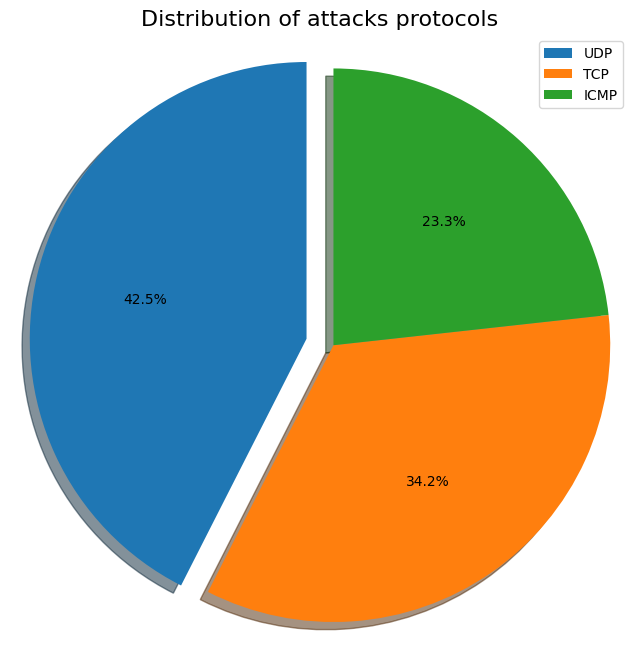

In [14]:
fig1, ax1 = plt.subplots(figsize=[8,8])
ax1.pie(percentage_attack_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of attacks protocols',fontsize = 16)
plt.show()

### Categorical features encoding process

In [15]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)

In [16]:
#The dataset after the encoding process
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


### Setting the input and output variables

In [17]:
#Setting the input and output variables of the model
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing process

In [18]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Setting the test and training set sizes

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

## Methodologies List
1. DNN
2. KNN
3. SVM
4. Decision tree
5. SGD
6. XGBoost

In [20]:
Classifier_accuracy = []

#### Building and compiling the Deep Neural Network Model

In [21]:
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Input_Layer"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

c:\Python\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 28)             │         1,596 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 10)             │           290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

#### Fitting The Model

In [22]:
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
2272/2272 - 3s - 1ms/step - accuracy: 0.9358 - loss: 0.1544 - val_accuracy: 0.9488 - val_loss: 0.1229
Epoch 2/100
2272/2272 - 2s - 836us/step - accuracy: 0.9657 - loss: 0.0858 - val_accuracy: 0.9612 - val_loss: 0.0916
Epoch 3/100
2272/2272 - 2s - 815us/step - accuracy: 0.9716 - loss: 0.0712 - val_accuracy: 0.9615 - val_loss: 0.1035
Epoch 4/100
2272/2272 - 2s - 828us/step - accuracy: 0.9743 - loss: 0.0649 - val_accuracy: 0.9793 - val_loss: 0.0525
Epoch 5/100
2272/2272 - 2s - 829us/step - accuracy: 0.9757 - loss: 0.0595 - val_accuracy: 0.9770 - val_loss: 0.0556
Epoch 6/100
2272/2272 - 2s - 829us/step - accuracy: 0.9783 - loss: 0.0545 - val_accuracy: 0.9772 - val_loss: 0.0597
Epoch 7/100
2272/2272 - 2s - 821us/step - accuracy: 0.9794 - loss: 0.0523 - val_accuracy: 0.9828 - val_loss: 0.0442
Epoch 8/100
2272/2272 - 2s - 820us/step - accuracy: 0.9811 - loss: 0.0466 - val_accuracy: 0.9776 - val_loss: 0.0499
Epoch 9/100
2272/2272 - 2s - 897us/step - accuracy: 0.9817 - loss: 0.0452 

#### Plotting the relationship between the model loss and the number of epochs 

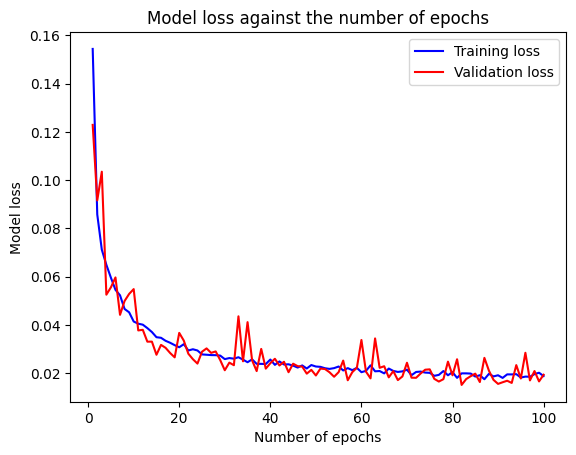

In [23]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Model loss against the number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Model loss')
plt.legend()
plt.show()

#### Plotting the relationship between the model accuracy and the number of epochs 

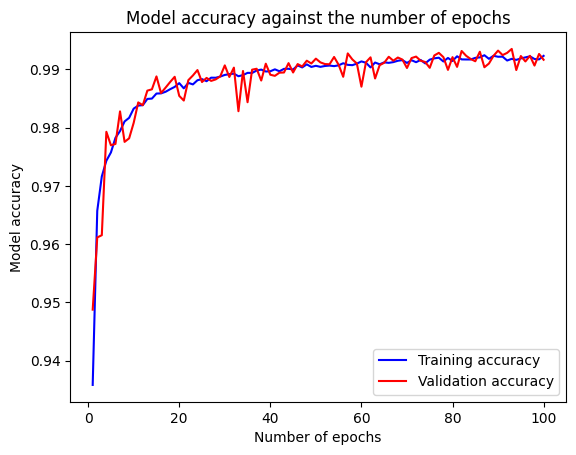

In [24]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'b', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Model accuracy against the number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Model accuracy')
plt.legend()
plt.show()

#### Evaluating The Model

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of the DNN : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

974/974 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9916 - loss: 0.0200
Accuracy of the DNN : 99.17


#### K-Nearest Neighbor Classifier

In [26]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the KNN Classifier : %.2f" % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

Accuracy of the KNN Classifier : 96.69


#### SVM Classifier

In [27]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Classifier : %.2f" % (accuracy*100) )
Classifier_accuracy.append(accuracy*100)

Accuracy of the SVM Classifier : 97.31


#### Decision Tree Classifier

In [28]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree Classifier : %.2f" % (accuracy*100) )
Classifier_accuracy.append(accuracy*100)

Accuracy of the Decision Tree Classifier : 96.47


#### Stochastic Gradient Classifier

In [29]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the SGD Classifier : %.2f" % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

Accuracy of the SGD Classifier : 83.09


#### XGBoost Classifier

In [30]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost Classifier : %.2f" % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

Accuracy of the XGBoost Classifier : 98.07


#### Save the model

In [31]:
model.save("DNN_model.keras")

In [32]:
# Load the model
loaded_model = tf.keras.models.load_model("DNN_model.keras")

#### Model predictions

In [33]:
classes = model.predict(X_test)
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
labels = ['benign','malign']
print(classification_report(y_test, y_pred, target_names = labels))

974/974 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step
              precision    recall  f1-score   support

      benign       1.00      0.99      0.99     18908
      malign       0.98      1.00      0.99     12244

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152

